In [1]:
import math
import sklearn
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/output_merge.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,description,length,speed,speedUncapped,freeFlow,jamFactor,confidence,traversability,realTime,lat,lng,jamTendency
0,0,0,San Rafael Ave,1067.0,29.166668,32.777780,29.166668,0.0,0.99,open,2023-02-13 22:30,34.14587,-118.16517,NaN
1,1,1,Duarte Rd,1057.0,13.055556,13.055556,16.944445,1.8,0.88,open,2023-02-13 22:30,34.13028,-118.07330,NaN
2,2,2,I-210/Foothill Fwy/E Walnut St,1606.0,11.944445,11.944445,12.500000,0.4,0.76,open,2023-02-13 22:30,34.14670,-118.08157,NaN
3,3,3,E Sierra Madre Villa Ave,31.0,5.000000,5.000000,11.111112,3.8,0.75,open,2023-02-13 22:30,34.14824,-118.08207,NaN
4,4,4,N Los Robles Ave,838.0,10.000000,10.000000,12.500000,1.6,0.84,open,2023-02-13 22:30,34.16883,-118.15069,NaN


In [6]:
df = df.drop('jamTendency', axis=1)

In [7]:
df.shape

(794612, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794612 entries, 0 to 794611
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0.1    794612 non-null  int64  
 1   Unnamed: 0      794612 non-null  int64  
 2   description     793978 non-null  object 
 3   length          794612 non-null  float64
 4   speed           793397 non-null  float64
 5   speedUncapped   793397 non-null  float64
 6   freeFlow        794612 non-null  float64
 7   jamFactor       794612 non-null  float64
 8   confidence      793397 non-null  float64
 9   traversability  794612 non-null  object 
 10  realTime        794612 non-null  object 
 11  lat             793978 non-null  float64
 12  lng             793978 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 78.8+ MB


In [9]:
df['jamFactor'].describe()

count    794612.000000
mean          0.926501
std           1.284299
min           0.000000
25%           0.000000
50%           0.300000
75%           1.500000
max          10.000000
Name: jamFactor, dtype: float64

In [10]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
description        634
length               0
speed             1215
speedUncapped     1215
freeFlow             0
jamFactor            0
confidence        1215
traversability       0
realTime             0
lat                634
lng                634
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.shape

(792763, 13)

In [13]:
df['jamFactor'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    792763.000000
mean          0.906958
std           1.219171
min           0.000000
25%           0.000000
50%           0.300000
75%           1.500000
90%           2.600000
95%           3.100000
99%           5.100000
max           9.900000
Name: jamFactor, dtype: float64

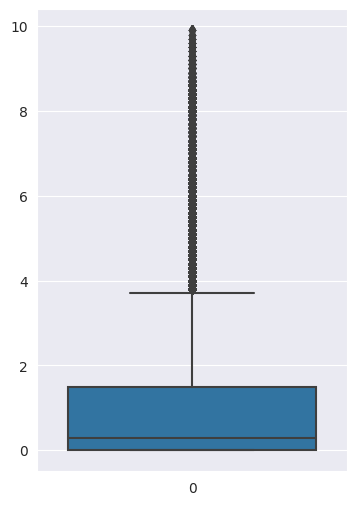

In [14]:
plt.figure(figsize=(4,6))
sns.boxplot(df['jamFactor'])
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792763 entries, 0 to 794611
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0.1    792763 non-null  int64  
 1   Unnamed: 0      792763 non-null  int64  
 2   description     792763 non-null  object 
 3   length          792763 non-null  float64
 4   speed           792763 non-null  float64
 5   speedUncapped   792763 non-null  float64
 6   freeFlow        792763 non-null  float64
 7   jamFactor       792763 non-null  float64
 8   confidence      792763 non-null  float64
 9   traversability  792763 non-null  object 
 10  realTime        792763 non-null  object 
 11  lat             792763 non-null  float64
 12  lng             792763 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 100.8+ MB


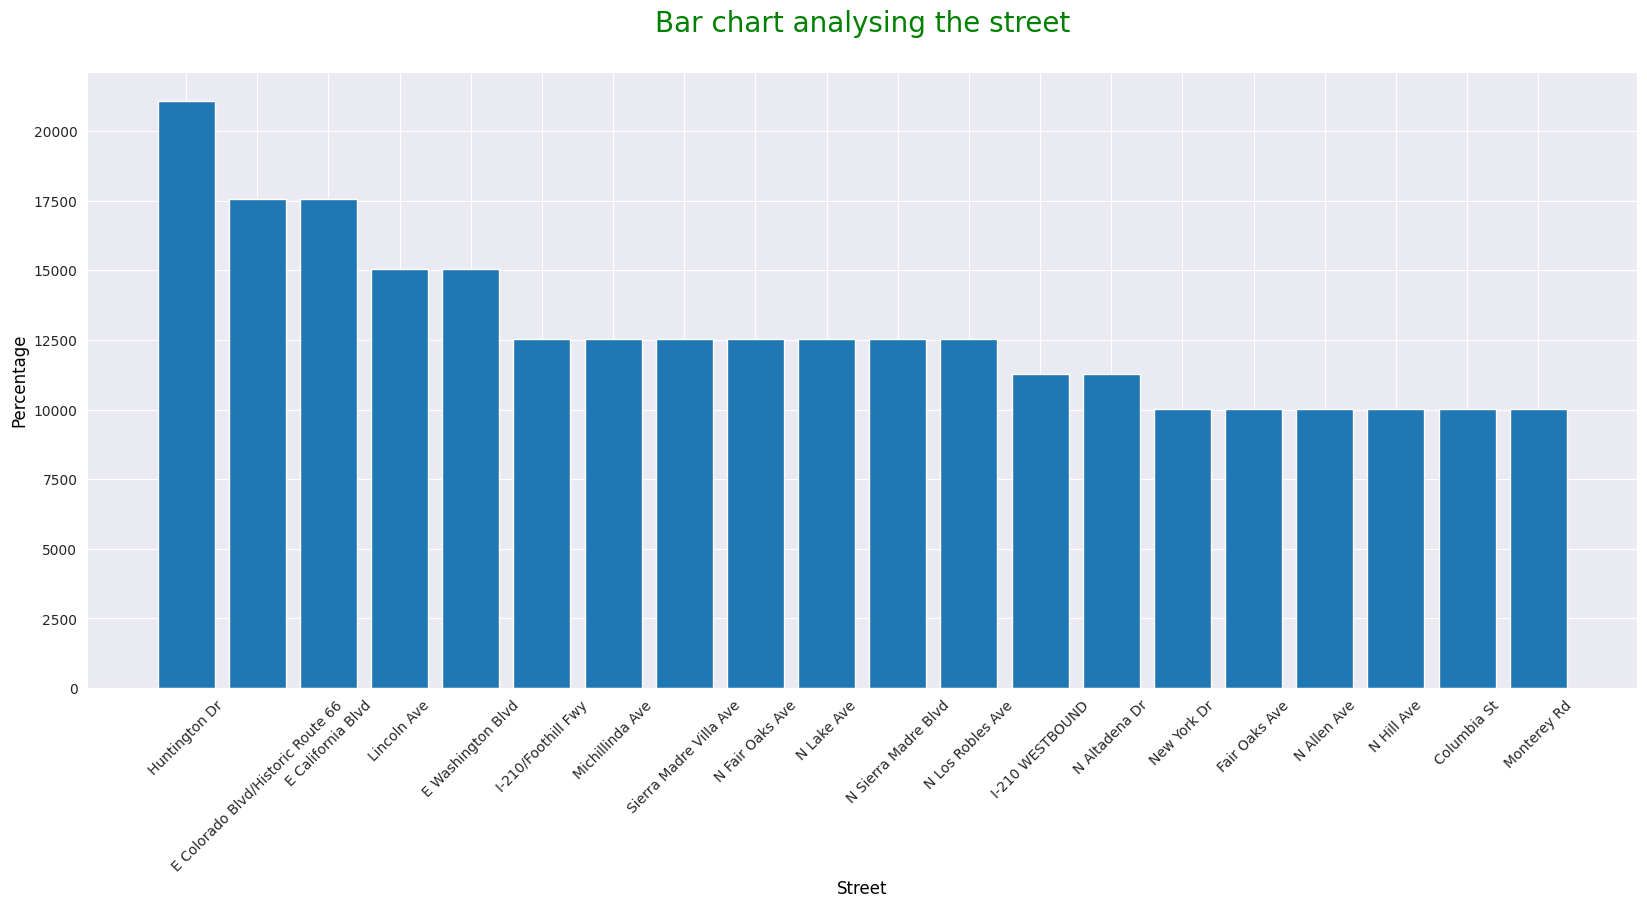

In [16]:
plt.figure(figsize= (20,8))
top20 = df["description"].value_counts()[:20]
plt.bar(top20.index, top20.values)
plt.xticks(rotation=45) 
plt.title("Bar chart analysing the street\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Street", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

In [17]:
data = df.drop(['Unnamed: 0.1','Unnamed: 0', 'lat', 'lng', 'length', 'speed', 'speedUncapped', 'freeFlow', 'confidence', 'traversability'], axis = 1)
data

,description,jamFactor,realTime
0,San Rafael Ave,0.0,2023-02-13 22:30
1,Duarte Rd,1.8,2023-02-13 22:30
2,I-210/Foothill Fwy/E Walnut St,0.4,2023-02-13 22:30
3,E Sierra Madre Villa Ave,3.8,2023-02-13 22:30
4,N Los Robles Ave,1.6,2023-02-13 22:30
...,...,...,...
794607,E California Blvd,0.3,2023-03-16 23:00
794608,Del Mar Ave,0.2,2023-03-16 23:00
794609,N Hill Ave,0.7,2023-03-16 23:00
794610,E Maple St,2.1,2023-03-16 23:00


In [18]:
data.groupby(['description', 'realTime']).sum()

jamFactor
description realTime                   
Allen Ave   2023-02-13 22:30        1.9
            2023-02-14 00:00        0.1
            2023-02-14 02:30        0.4
            2023-02-14 03:00        0.3
            2023-02-14 10:30        5.7
...                                 ...
York Blvd   2023-03-12 22:00        2.1
            2023-03-12 22:30        1.6
            2023-03-12 23:00        0.5
            2023-03-12 23:30        0.4
            2023-03-16 23:00        0.7

[207941 rows x 1 columns]

In [19]:
data_cov = pd.pivot_table(data = data, index = "realTime", columns = "description", values = "jamFactor", aggfunc="sum")
data_cov

description,Allen Ave,Allen Ave/Pinecrest Dr,Arden Rd/Kewen Dr,Arroyo Dr,Avenue 64,Baldwin Ave,Bridewell St,CA-110,CA-110/Arroyo Pky,CA-110/Historic Route 66/Arroyo Pky,...,W Walnut St,W Walnut St/W Maple St,W Washington Blvd,W Woodbury Rd,WINDSOR AVE SOUTHBOUND AND N ARROYO BLVD NORTHBOUND,Washington Blvd,West Dr,Windsor Ave,Woodbury Rd,York Blvd
realTime,,,,,,,,,,,,,,,,,,,,,
2023-02-13 22:30,1.9,0.0,0.5,1.0,1.7,0.7,3.3,1.3,1.6,2.7,...,1.7,0.3,1.2,0.0,0.8,0.0,3.2,0.0,0.0,1.4
2023-02-14 00:00,0.1,0.0,0.1,0.1,0.1,0.0,0.2,0.1,0.0,0.1,...,1.0,0.0,0.1,0.0,0.1,2.4,0.1,0.0,0.0,0.4
2023-02-14 02:30,0.4,0.0,0.4,0.0,0.3,0.0,0.2,0.3,0.1,0.2,...,0.0,0.0,0.1,0.0,0.1,0.3,0.1,1.5,0.1,0.4
2023-02-14 03:00,0.3,0.0,0.4,0.9,0.3,0.0,0.2,0.4,0.2,0.2,...,0.0,0.0,0.1,0.0,0.1,0.1,0.1,0.0,0.1,0.4
2023-02-14 10:30,5.7,0.3,3.9,0.9,2.2,1.4,4.3,2.6,6.9,10.1,...,1.4,0.0,1.2,1.4,1.2,2.2,2.0,0.0,1.3,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:00,1.5,1.0,0.1,0.5,0.4,0.6,3.3,1.3,0.9,2.4,...,2.1,0.0,1.2,0.5,0.9,0.9,2.7,0.0,0.8,2.1
2023-03-12 22:30,1.0,0.0,1.8,0.9,0.4,0.0,3.3,1.1,1.6,1.3,...,2.6,0.3,0.8,0.0,2.6,0.7,2.7,0.0,0.1,1.6
2023-03-12 23:00,0.2,0.0,0.0,0.0,0.5,0.2,0.5,0.2,0.8,0.3,...,0.0,0.0,0.0,1.6,0.1,0.0,0.9,0.0,0.0,0.5


In [20]:
train_len = 836
train = data_cov[0 : train_len]
test = data_cov[train_len : ]

In [21]:
print(train.shape)
print(test.shape)

(836, 199)
(209, 199)


In [22]:
train_mean = np.mean(train)
train_mean

description
Allen Ave                 7.656220
Allen Ave/Pinecrest Dr    0.248565
Arden Rd/Kewen Dr         3.265670
Arroyo Dr                 0.896411
Avenue 64                 2.518301
                            ...   
Washington Blvd           2.355865
West Dr                   2.376435
Windsor Ave               0.565072
Woodbury Rd               1.360409
York Blvd                 2.193541
Length: 199, dtype: float64

In [23]:
train_std = np.std(train)
train_std

description
Allen Ave                 8.514183
Allen Ave/Pinecrest Dr    0.528685
Arden Rd/Kewen Dr         3.012797
Arroyo Dr                 1.195471
Avenue 64                 2.509677
                            ...   
Washington Blvd           2.290414
West Dr                   2.164372
Windsor Ave               1.375364
Woodbury Rd               1.348917
York Blvd                 1.786695
Length: 199, dtype: float64

In [24]:
train_CoV = train_std/train_mean
train_CoV

description
Allen Ave                 1.112061
Allen Ave/Pinecrest Dr    2.126951
Arden Rd/Kewen Dr         0.922566
Arroyo Dr                 1.333618
Avenue 64                 0.996575
                            ...   
Washington Blvd           0.972218
West Dr                   0.910764
Windsor Ave               2.433964
Woodbury Rd               0.991552
York Blvd                 0.814526
Length: 199, dtype: float64

In [25]:
CoV = pd.DataFrame({'Mean' : train_mean, 'Std_Dev' : train_std, 'Coeff_of_Var' : train_CoV})
CoV

,Mean,Std_Dev,Coeff_of_Var
description,,,
Allen Ave,7.656220,8.514183,1.112061
Allen Ave/Pinecrest Dr,0.248565,0.528685,2.126951
Arden Rd/Kewen Dr,3.265670,3.012797,0.922566
Arroyo Dr,0.896411,1.195471,1.333618
Avenue 64,2.518301,2.509677,0.996575
...,...,...,...
Washington Blvd,2.355865,2.290414,0.972218
West Dr,2.376435,2.164372,0.910764
Windsor Ave,0.565072,1.375364,2.433964


In [26]:
CoV.sort_values('Coeff_of_Var')

,Mean,Std_Dev,Coeff_of_Var
description,,,
Lincoln Ave,10.557895,7.606496,0.720456
San Pascual Ave,3.616388,2.632136,0.727836
ORANGE GROVE AVE,2.698804,1.988646,0.736862
Virginia Rd,4.821172,3.618836,0.750613
Corson St,6.370933,4.865667,0.763729
...,...,...,...
E MAPLE ST WESTBOUND,0.060287,0.301911,5.007886
I-210/Foothill Fwy/N Halstead St,0.063038,0.424472,6.733567
CA-134 WESTBOUND,0.010526,0.087135,8.277846


In [27]:
data_LA = data[data['description'] == 'Lincoln Ave']
data_LA

,description,jamFactor,realTime
18,Lincoln Ave,2.5,2023-02-13 22:30
32,Lincoln Ave,0.0,2023-02-13 22:30
104,Lincoln Ave,0.0,2023-02-13 22:30
239,Lincoln Ave,0.0,2023-02-13 22:30
364,Lincoln Ave,1.2,2023-02-13 22:30
...,...,...,...
794343,Lincoln Ave,0.2,2023-03-16 23:00
794393,Lincoln Ave,0.6,2023-03-16 23:00
794446,Lincoln Ave,0.0,2023-03-16 23:00
794447,Lincoln Ave,0.0,2023-03-16 23:00


In [28]:
data1 = data_LA.groupby(['realTime'])['jamFactor'].sum()
print(data1)

realTime
2023-02-13 22:30     7.3
2023-02-14 00:00     2.0
2023-02-14 02:30     3.2
2023-02-14 03:00     0.7
2023-02-14 10:30    10.2
                    ... 
2023-03-12 22:00     7.3
2023-03-12 22:30     9.3
2023-03-12 23:00     4.4
2023-03-12 23:30     3.1
2023-03-16 23:00     2.8
Name: jamFactor, Length: 1045, dtype: float64


In [29]:
data1 = pd.DataFrame(data1)

In [30]:
data1.index = pd.to_datetime(data1.index)

In [31]:
data1.index.dtype

dtype('<M8[ns]')

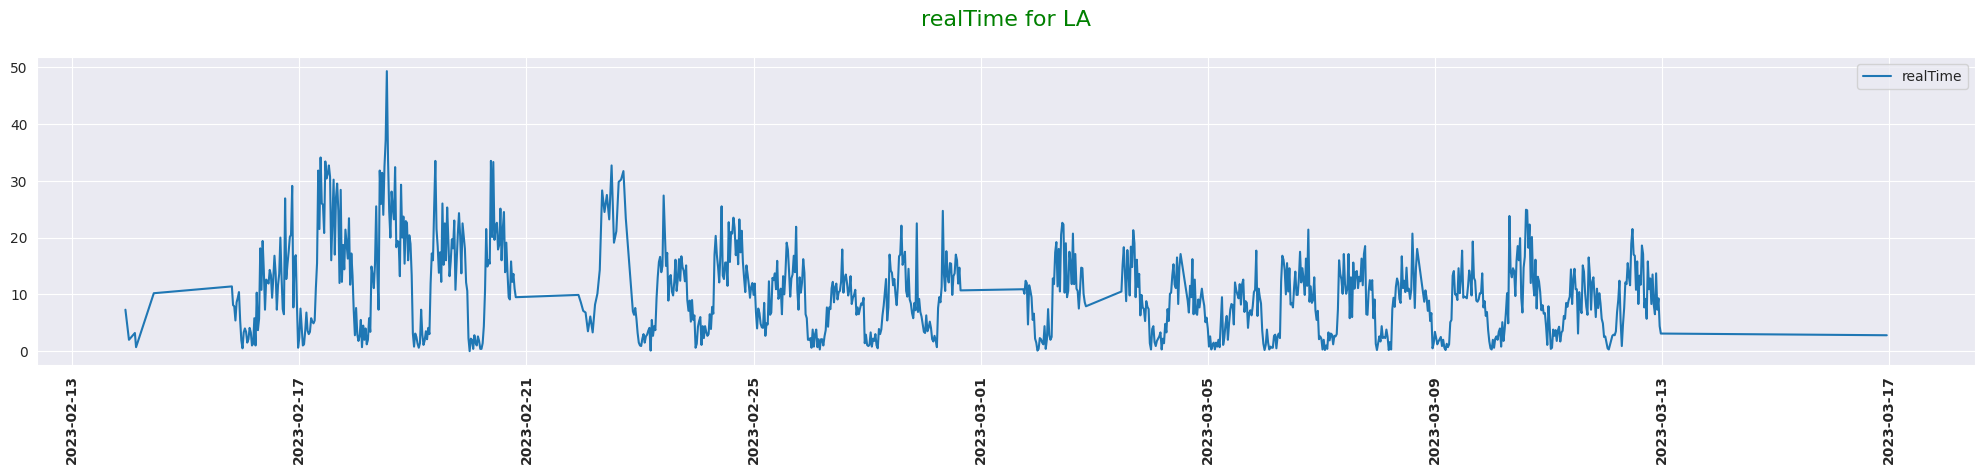

In [32]:
plt.figure(figsize=(25,4))
plt.plot(data1, label='realTime')
plt.legend(loc='best')
plt.title('realTime for LA\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

In [33]:
train_len = 836
train = data1[0 : train_len]
test = data1[train_len : ]
train.head()

,jamFactor
realTime,
2023-02-13 22:30:00,7.3
2023-02-14 00:00:00,2.0
2023-02-14 02:30:00,3.2
2023-02-14 03:00:00,0.7
2023-02-14 10:30:00,10.2


In [34]:
test.head()

,jamFactor
realTime,
2023-03-08 12:30:00,10.6
2023-03-08 13:00:00,11.0
2023-03-08 13:30:00,9.2
2023-03-08 14:00:00,10.8
2023-03-08 14:30:00,20.7


In [35]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['jamFactor'][train_len-1]

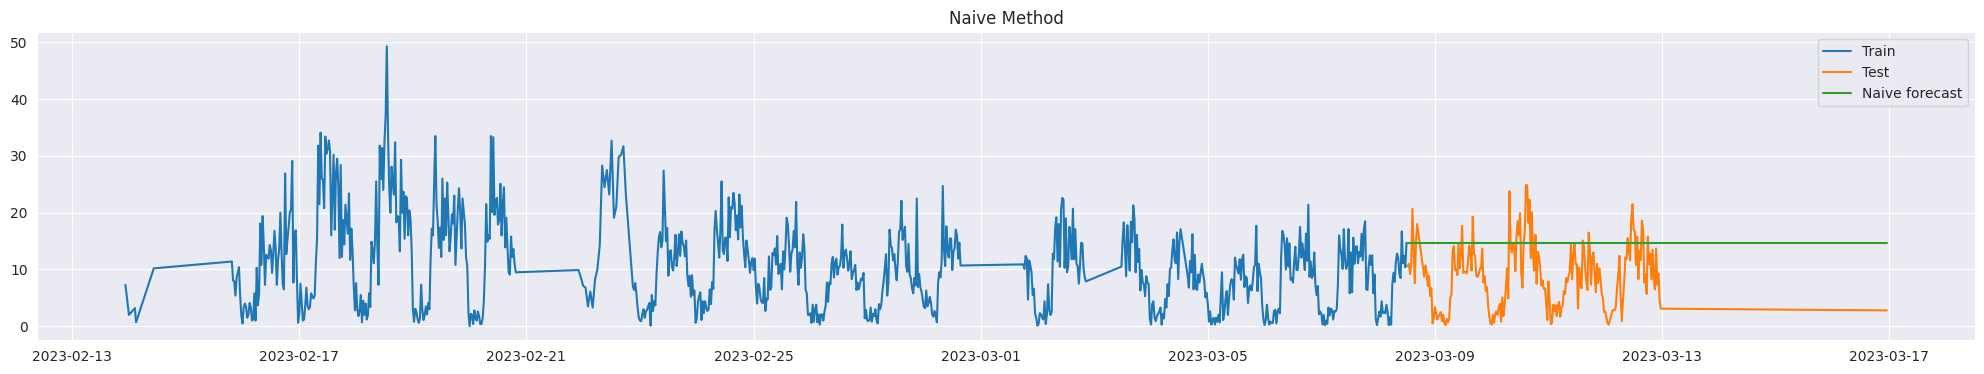

In [36]:
plt.figure(figsize=(25,4))
plt.plot(train['jamFactor'], label='Train')
plt.plot(test['jamFactor'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [37]:
# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['jamFactor'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['jamFactor']-y_hat_naive['naive_forecast'])/test['jamFactor'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,8.07,354.71


In [38]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['jamFactor'].mean()

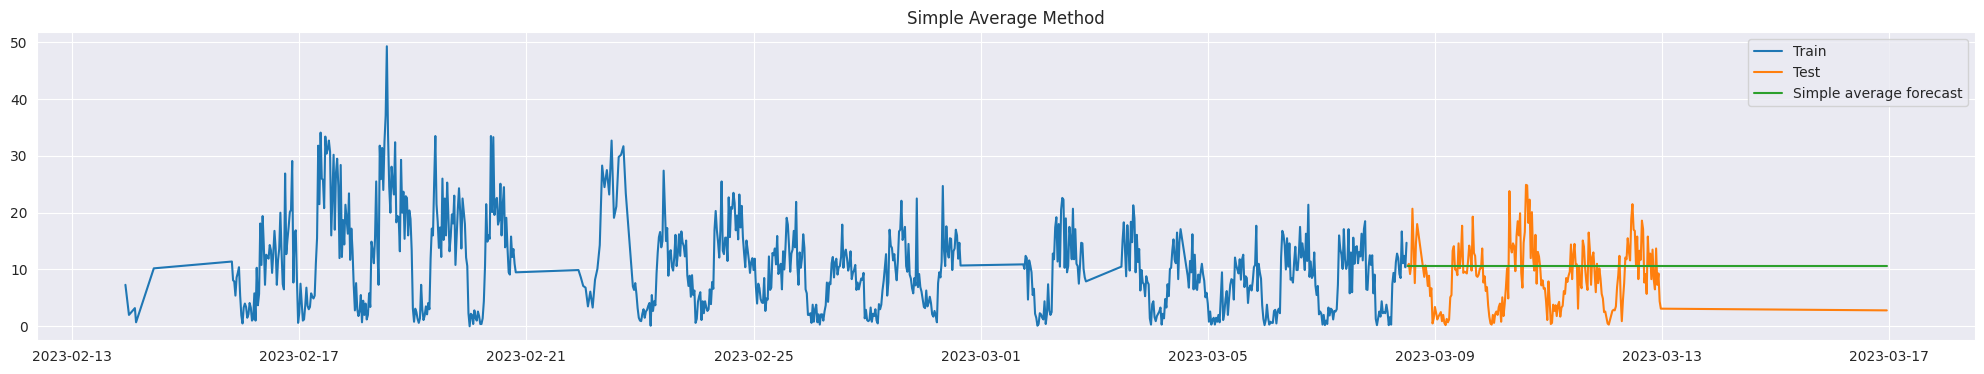

In [39]:
plt.figure(figsize=(25,4))
plt.plot(train['jamFactor'], label='Train')
plt.plot(test['jamFactor'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [40]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['jamFactor'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['jamFactor']-y_hat_avg['avg_forecast'])/test['jamFactor'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,8.07,354.71
0,Simple average method,5.81,241.18


In [41]:
y_hat_sma = data1.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data1['jamFactor'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

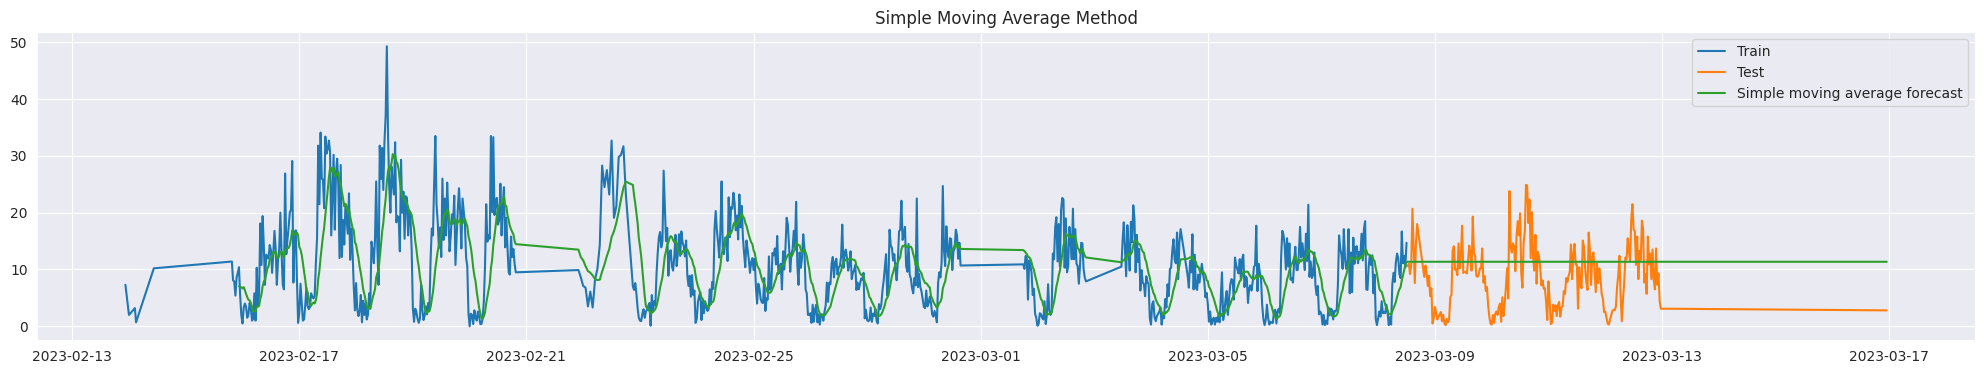

In [42]:
# Plot train, test and forecast
plt.figure(figsize=(25,4))
plt.plot(train['jamFactor'], label='Train')
plt.plot(test['jamFactor'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [43]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['jamFactor'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['jamFactor']-y_hat_sma['sma_forecast'][train_len:])/test['jamFactor'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,8.07,354.71
0,Simple average method,5.81,241.18
0,Simple moving average forecast,6.09,262.09


In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['jamFactor'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))
print(model_fit.forecast(len(test)))
y_hat_ses['ses_forecast'] = 13.163115
print(y_hat_ses['ses_forecast'])

836     13.163115
837     13.163115
838     13.163115
839     13.163115
840     13.163115
          ...    
1040    13.163115
1041    13.163115
1042    13.163115
1043    13.163115
1044    13.163115
Length: 209, dtype: float64
realTime
2023-03-08 12:30:00    13.163115
2023-03-08 13:00:00    13.163115
2023-03-08 13:30:00    13.163115
2023-03-08 14:00:00    13.163115
2023-03-08 14:30:00    13.163115
                         ...    
2023-03-12 22:00:00    13.163115
2023-03-12 22:30:00    13.163115
2023-03-12 23:00:00    13.163115
2023-03-12 23:30:00    13.163115
2023-03-16 23:00:00    13.163115
Name: ses_forecast, Length: 209, dtype: float64


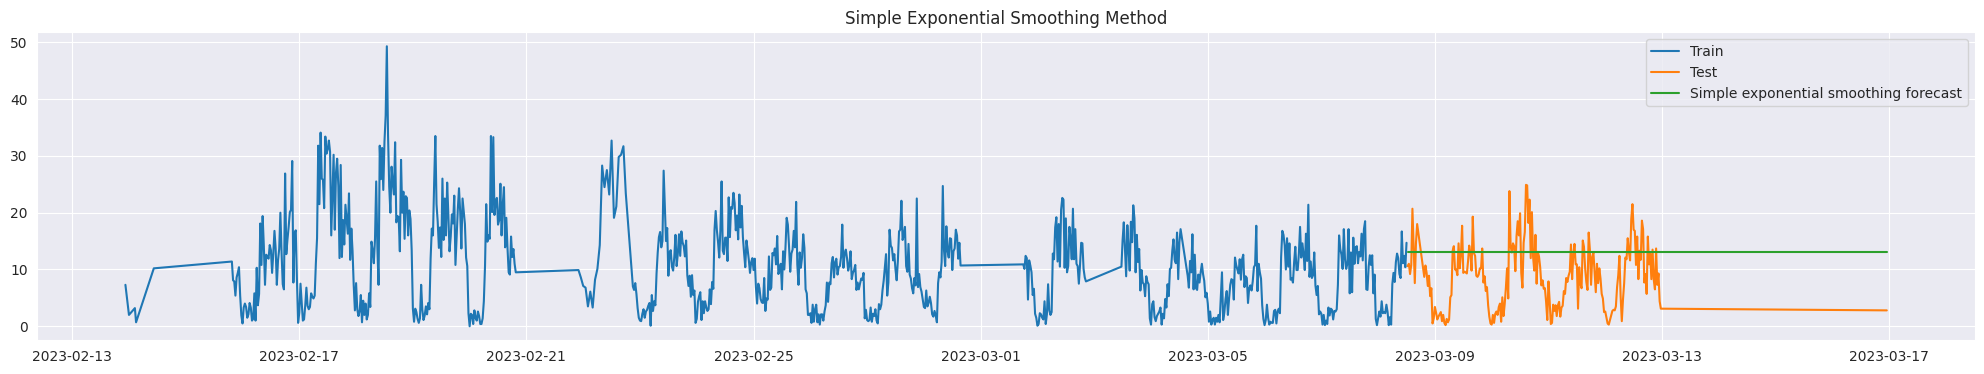

In [45]:
# Plot train, test, forecast
plt.figure(figsize=(25,4))
plt.plot(train['jamFactor'], label='Train')
plt.plot(test['jamFactor'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [46]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['jamFactor'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['jamFactor']-y_hat_ses['ses_forecast'])/test['jamFactor'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,8.07,354.71
0,Simple average method,5.81,241.18
0,Simple moving average forecast,6.09,262.09
0,Simple exponential smoothing forecast,7.04,310.94


In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['jamFactor']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.5566130995350603, 'smoothing_trend': 1.1595583611217508e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 5.310343811757564, 'initial_trend': 0.009402000685633276, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


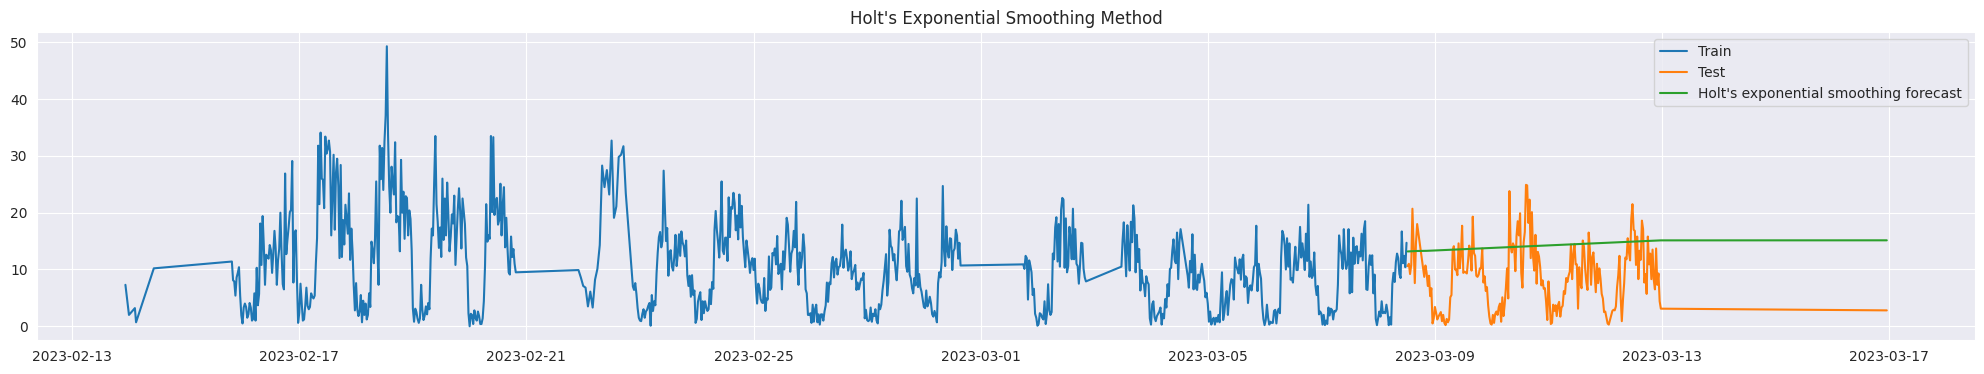

In [48]:
# Plot train, test, forecast

plt.figure(figsize=(25,4))
plt.plot( train['jamFactor'], label='Train')
plt.plot(test['jamFactor'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [49]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['jamFactor'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['jamFactor']-y_hat_holt['holt_forecast'])/test['jamFactor'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,8.07,354.71
0,Simple average method,5.81,241.18
0,Simple moving average forecast,6.09,262.09
0,Simple exponential smoothing forecast,7.04,310.94
0,Holt's exponential smoothing method,7.68,334.83


In [50]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['jamFactor']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.5616537944599685, 'smoothing_trend': 7.809337058900038e-06, 'smoothing_seasonal': 2.6035610952186374e-05, 'damping_trend': nan, 'initial_level': 5.5188909920203875, 'initial_trend': 0.009818323269825898, 'initial_seasons': array([-0.17226297,  0.04815206, -0.3551278 , -0.48105263,  0.1487752 ,
       -0.43416388, -0.02458567, -0.4514628 ,  0.46272476, -0.86035481,
        0.21599002, -0.30926551]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


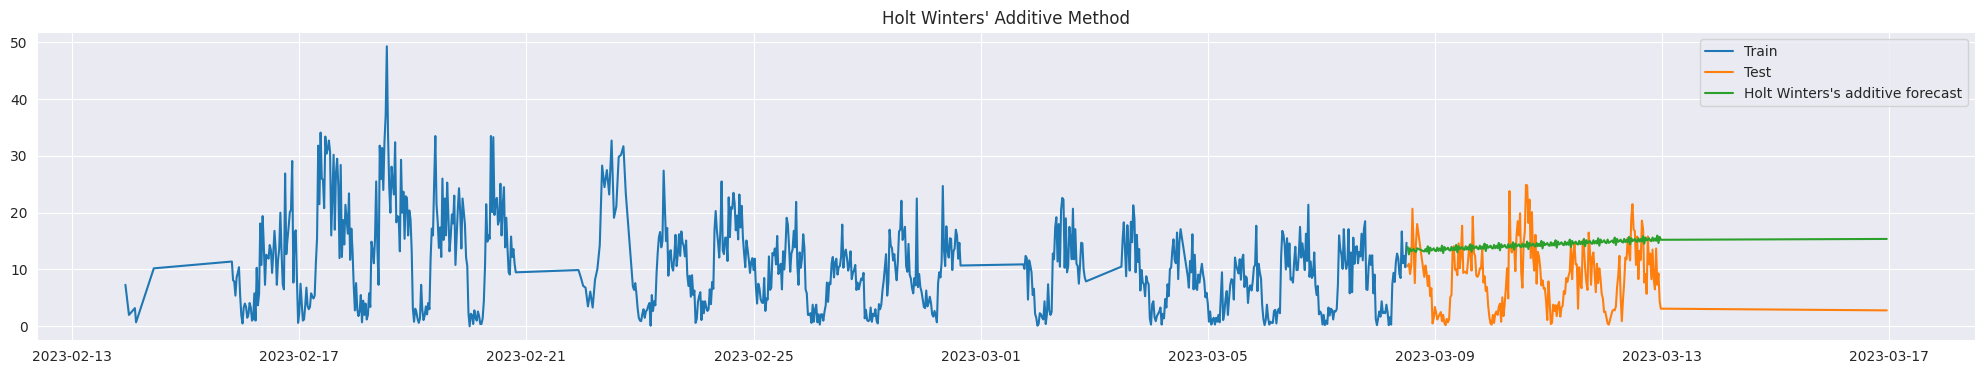

In [51]:
plt.figure(figsize=(25,4))
plt.plot( train['jamFactor'], label='Train')
plt.plot(test['jamFactor'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()


In [52]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['jamFactor'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['jamFactor']-y_hat_hwa['hw_forecast'])/test['jamFactor'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,8.07,354.71
0,Simple average method,5.81,241.18
0,Simple moving average forecast,6.09,262.09
0,Simple exponential smoothing forecast,7.04,310.94
0,Holt's exponential smoothing method,7.68,334.83
0,Holt Winters' additive method,7.81,340.63


In [53]:
y_hat_hwm = test.copy()
train = train[train['jamFactor'] > 0]
model = ExponentialSmoothing(np.asarray(train['jamFactor']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.5547616344153236, 'smoothing_trend': 5.456148951475234e-08, 'smoothing_seasonal': 1.6827380576589752e-09, 'damping_trend': nan, 'initial_level': 2.639655076945211, 'initial_trend': 0.0018488719733807419, 'initial_seasons': array([2.09368864, 2.01376016, 1.89084286, 1.99871038, 2.11106717,
       2.02391358, 1.97606866, 2.11328445, 2.07130398, 2.03394753,
       2.05477665, 2.14736431]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


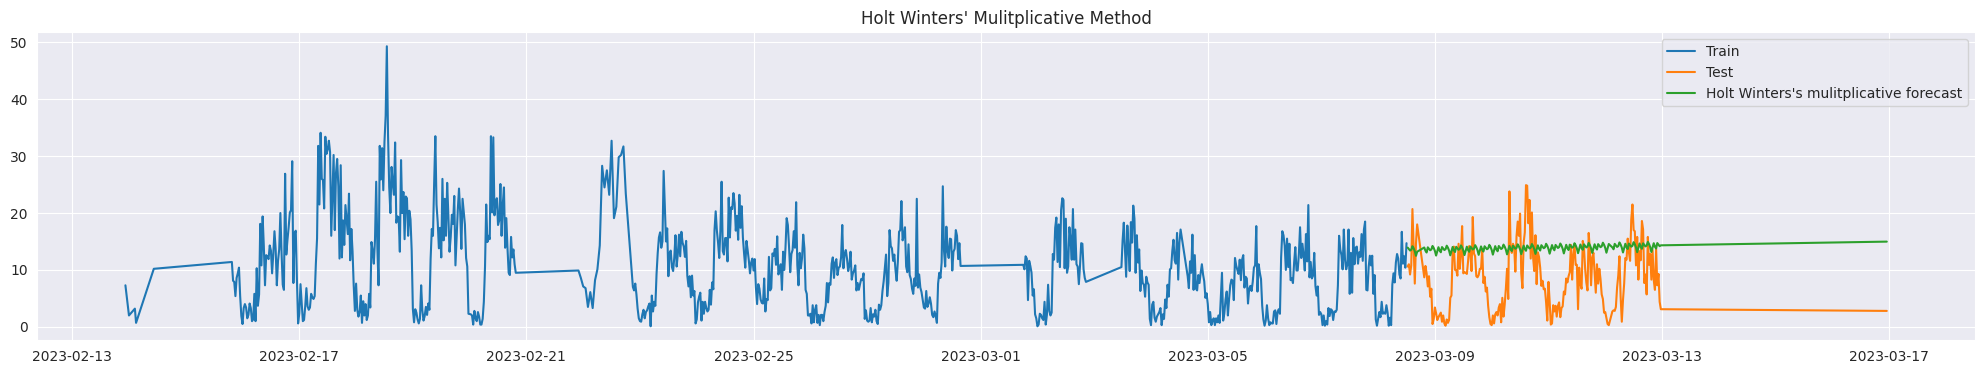

In [54]:
plt.figure(figsize=(25,4))
plt.plot( train['jamFactor'], label='Train')
plt.plot(test['jamFactor'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

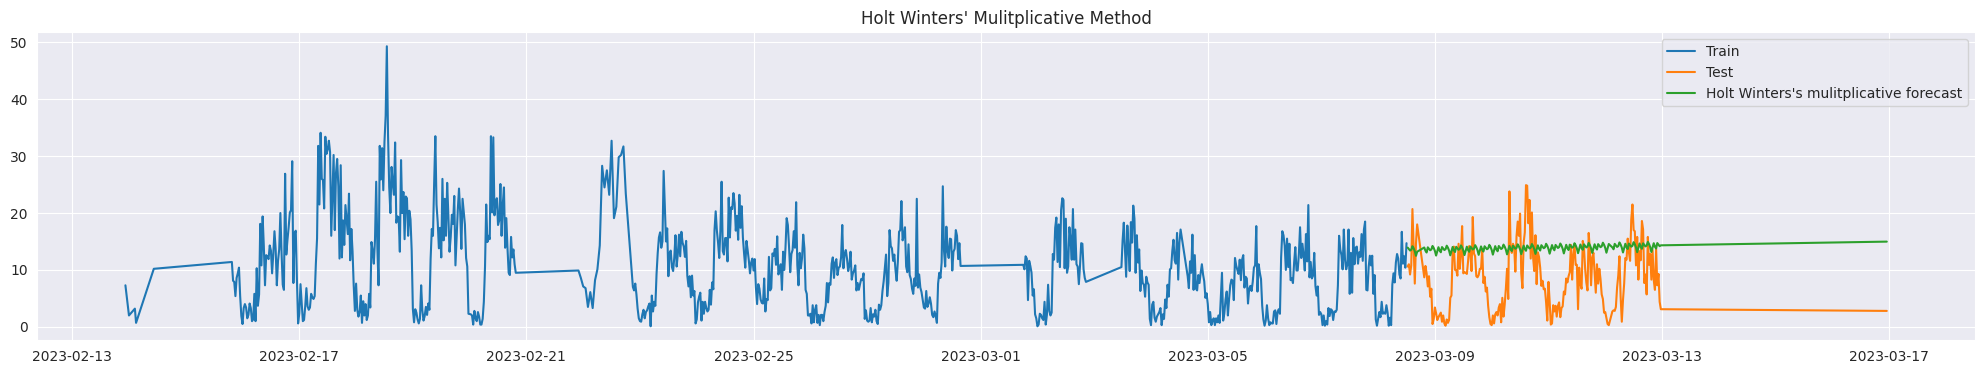

In [55]:
plt.figure(figsize=(25,4))
plt.plot( train['jamFactor'], label='Train')
plt.plot(test['jamFactor'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [56]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['jamFactor'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['jamFactor']-y_hat_hwm['hw_forecast'])/test['jamFactor'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,8.07,354.71
0,Simple average method,5.81,241.18
0,Simple moving average forecast,6.09,262.09
0,Simple exponential smoothing forecast,7.04,310.94
0,Holt's exponential smoothing method,7.68,334.83
0,Holt Winters' additive method,7.81,340.63
0,Holt Winters' multiplicative method,7.47,330.08


In [57]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['jamFactor'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -8.722097
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [58]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1['jamFactor'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % (kpss_test[1]))

KPSS Statistic: 0.855396
Critical Values @ 0.05: 0.46
p-value: 0.010000


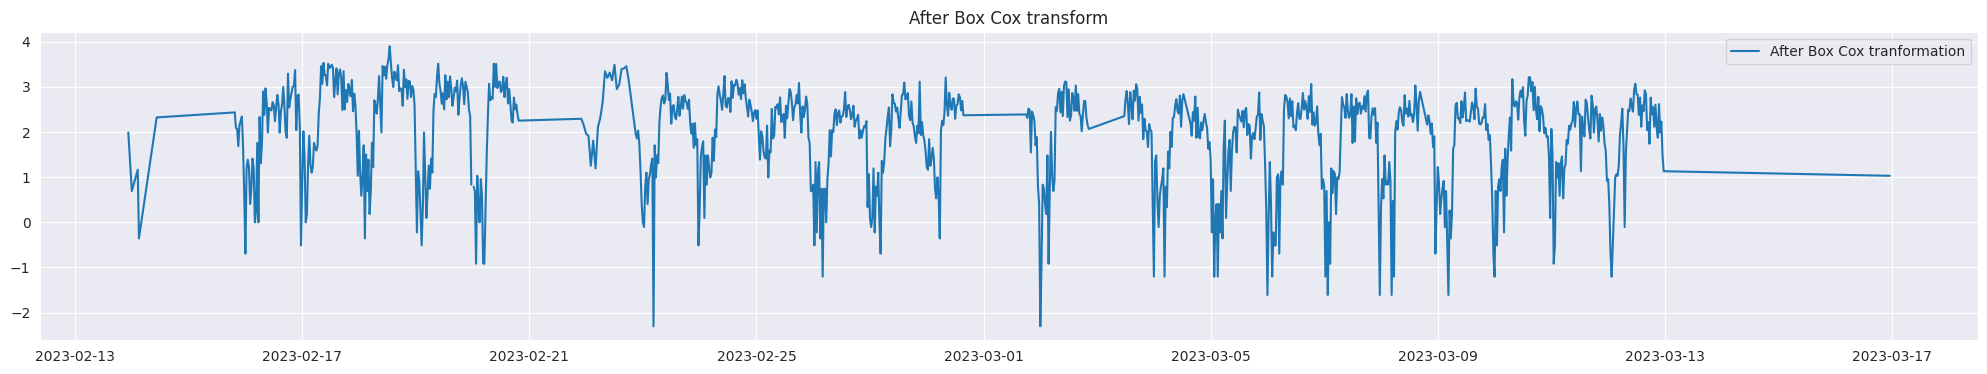

In [59]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['jamFactor'], lmbda=0), index = data1.index)

plt.figure(figsize=(25,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

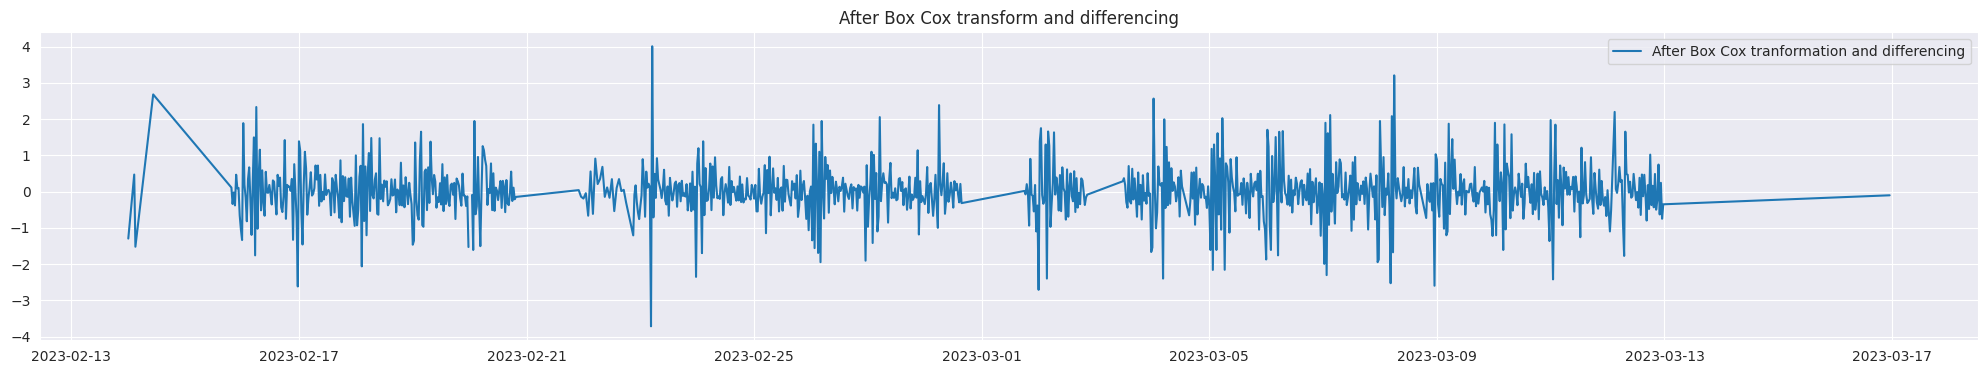

In [60]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(25,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [61]:

data_boxcox_diff = data_boxcox_diff.fillna(0)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1]*10)

KPSS Statistic: 0.855396
Critical Values @ 0.05: 0.46
p-value: 0.010000p-value: 0.010000p-value: 0.010000p-value: 0.010000p-value: 0.010000p-value: 0.010000p-value: 0.010000p-value: 0.010000p-value: 0.010000p-value: 0.010000
